## 第 12 回　遺伝子データ解析

### 参考文献：先進ゲノム解析研究推進プラットフォーム (編集)、独習 Python バイオ情報解析、羊土社
---
---
### 目的：ヒト胚性幹細胞を胚様体とした分化過程のシングルセル RNA-Seq 解析データから論文用の図を作成する。

K.R. Moon et al., Visualizing structure and transitions in high-dimensional biological data, Nature Biotechnology, Vol. 37, 1482-1492, 2019.

---
---
## シングルセル解析 2
### 次元削減
---

### 解析に必要なライブラリのインポート

In [1]:
import matplotlib.pyplot as plt

---
### S 字の生成と可視化

#### sklearn を使って S 字データを生成して、matplotlib を使って 3 次元空間で可視化

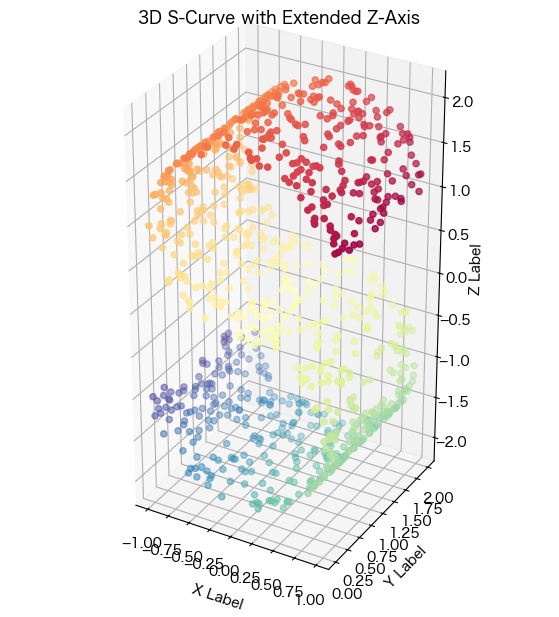

In [4]:
from sklearn.datasets import make_s_curve
from mpl_toolkits.mplot3d import Axes3D

# S 字データの生成
X, t = make_s_curve(1000, random_state=0)

# 3Dプロットの作成
fig = plt.figure(figsize=(12, 7))  # プロットのサイズ設定
ax = fig.add_subplot(111, projection='3d')

# データポイントのプロット（色はtに基づく、rainbowカラーマップを使用）
sc = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=t, cmap="Spectral")

# 軸のアスペクト比を設定（Z軸を長くする）
ax.set_box_aspect((1, 1, 2))  # X, Y, Z軸の比率

# ラベルの設定
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title('3D S-Curve with Extended Z-Axis')

# プロットの表示
plt.show()

---
### 主成分分析（principal component analysis; PCA）

**課題 1：** 主成分分析についてまとめて下さい。

主成分分析（Principal Component Analysis, PCA）は、多変量データ解析の手法であり、データの次元を削減し、データの構造を抽出するために使用されます

#### sklearn を用いて主成分分析

**課題 2：** S 字データに対して PCA を実行した結果をグラフで可視化して下さい。

解答例

<img src="figs/pca.jpg" width="400px">

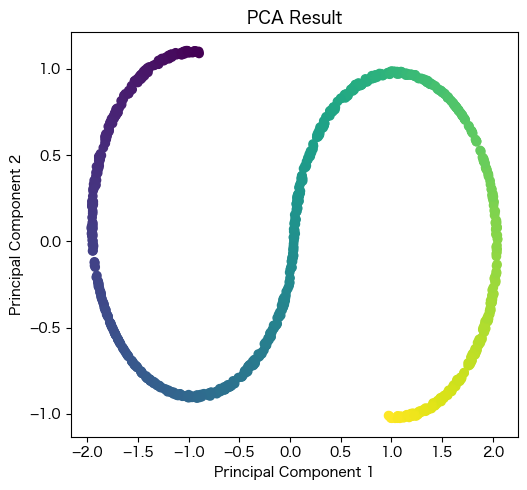

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA



# 主成分分析の実行
pca = PCA(n_components=2)
s_curve_pca = pca.fit_transform(X, t )

# グラフの描画
plt.figure(figsize=(10, 5))



# PCAの結果の可視化
plt.subplot(1, 2, 2)
plt.title('PCA Result')
plt.scatter(s_curve_pca[:, 0], s_curve_pca[:, 1], c=t, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()


---
### 多次元尺度構成法（multidimensional scaling; MDS）

**課題 3：** 多次元尺度構成法（multidimensional scaling; MDS）についてまとめて下さい。


ChatGPT
多次元尺度構成法（Multidimensional Scaling; MDS）は、データセット内のオブジェクト（サンプル、観測値、アイテムなど）間の距離または類似性を用いて、オブジェクトの配置を低次元空間で表現する手法です。こ

#### sklearn を用いて多次元尺度構成法

**課題 4：** S 字データに対して MDS を実行した結果をグラフで可視化して下さい。

解答例

<img src="figs/mds.jpg" width="400px">

/Users/shishishikakou/Downloads/データサイエンス特論/.venv/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


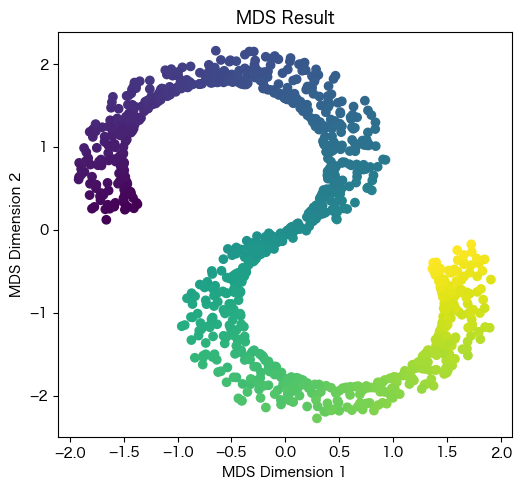

In [6]:

from sklearn.manifold import MDS


# MDSの実行
mds = MDS(n_components=2)
s_curve_mds = mds.fit_transform(X,t)

# グラフの描画
plt.figure(figsize=(10, 5))



# MDSの結果の可視化
plt.subplot(1, 2, 2)
plt.title('MDS Result')
plt.scatter(s_curve_mds[:, 0], s_curve_mds[:, 1], c=t, cmap='viridis')
plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')

plt.tight_layout()
plt.show()


---
### 確率的近傍埋め込み（stochastic neighbor embedding; SNE）

**課題 5：** 確率的近傍埋め込み（stochastic neighbor embedding; SNE）についてまとめて下さい。
<br>確率的近傍埋め込み（Stochastic Neighbor Embedding; SNE）は、高次元データを可視化するための非線形次元削減手法の一つです。2008年に提案されたt-SNE（t-distributed Stochastic Neighbor Embedding）がよく知られています。

---
### t-SNE（t-distributed stochastic neighbor embedding：t 分布型確率的近傍埋め込み）

**課題 6：** t 分布型確率的近傍埋め込み(t-distributed stochastic neighbor embedding; t-SNE)についてまとめて下さい。
<br>t-SNE（t-distributed Stochastic Neighbor Embedding）は、高次元データの可視化に使用される非線形次元削減手法の一種です。2008年にLaurens van der MaatenとGeoffrey Hintonによって提案されました。

#### sklearn を用いて t-SNE

**課題 7：** S 字データに対して t-SNE を実行した結果をグラフで可視化して下さい。

解答例

<img src="figs/tsne.jpg" width="400px">

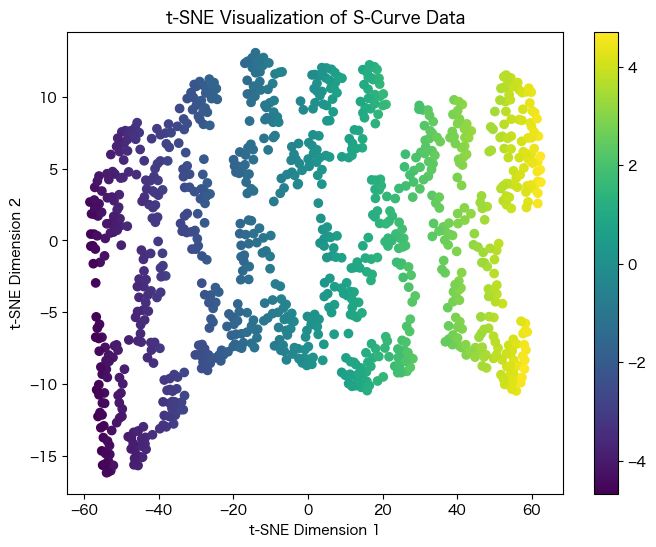

In [7]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.manifold import TSNE

# S字データの生成
data, labels = datasets.make_s_curve(n_samples=1000, random_state=42)

# t-SNEの適用
tsne = TSNE(n_components=2, random_state=42)
data_tsne = tsne.fit_transform(data)

# 可視化
plt.figure(figsize=(8, 6))
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=labels, cmap='viridis')
plt.title('t-SNE Visualization of S-Curve Data')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.colorbar()
plt.show()


---
### UMAP
**課題 8：** 一様多様体近似と射影（Uniform Manifold Approximation and Projection; UMAP）についてまとめて下さい。
<br>Uniform Manifold Approximation and Projection（UMAP）は、高次元データの可視化に使用される手法であり、主に非線形次元削減の一環として利用されます。UMAPは、t-SNEと同様に、データの局所的および大域的な構造を保持し、クラスターをより効果的に可視化することができる特長があります。

#### sklearn を用いて UMAP

**課題 9：** S 字データに対して UMAP を実行した結果をグラフで可視化して下さい。

解答例

<img src="figs/umap.jpg" width="400px">

In [11]:
import matplotlib.pyplot as plt
import umap
from sklearn import datasets

# S字データの生成
data, labels = datasets.make_s_curve(n_samples=1000, random_state=42)

# UMAPの適用
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
data_umap = umap_model.fit_transform(data)

# 可視化
plt.figure(figsize=(8, 6))
plt.scatter(data_umap[:, 0], data_umap[:, 1], c=labels, cmap='viridis')
plt.title('UMAP Visualization of S-Curve Data')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.colorbar()
plt.show()


AttributeError: module 'umap' has no attribute 'UMAP'

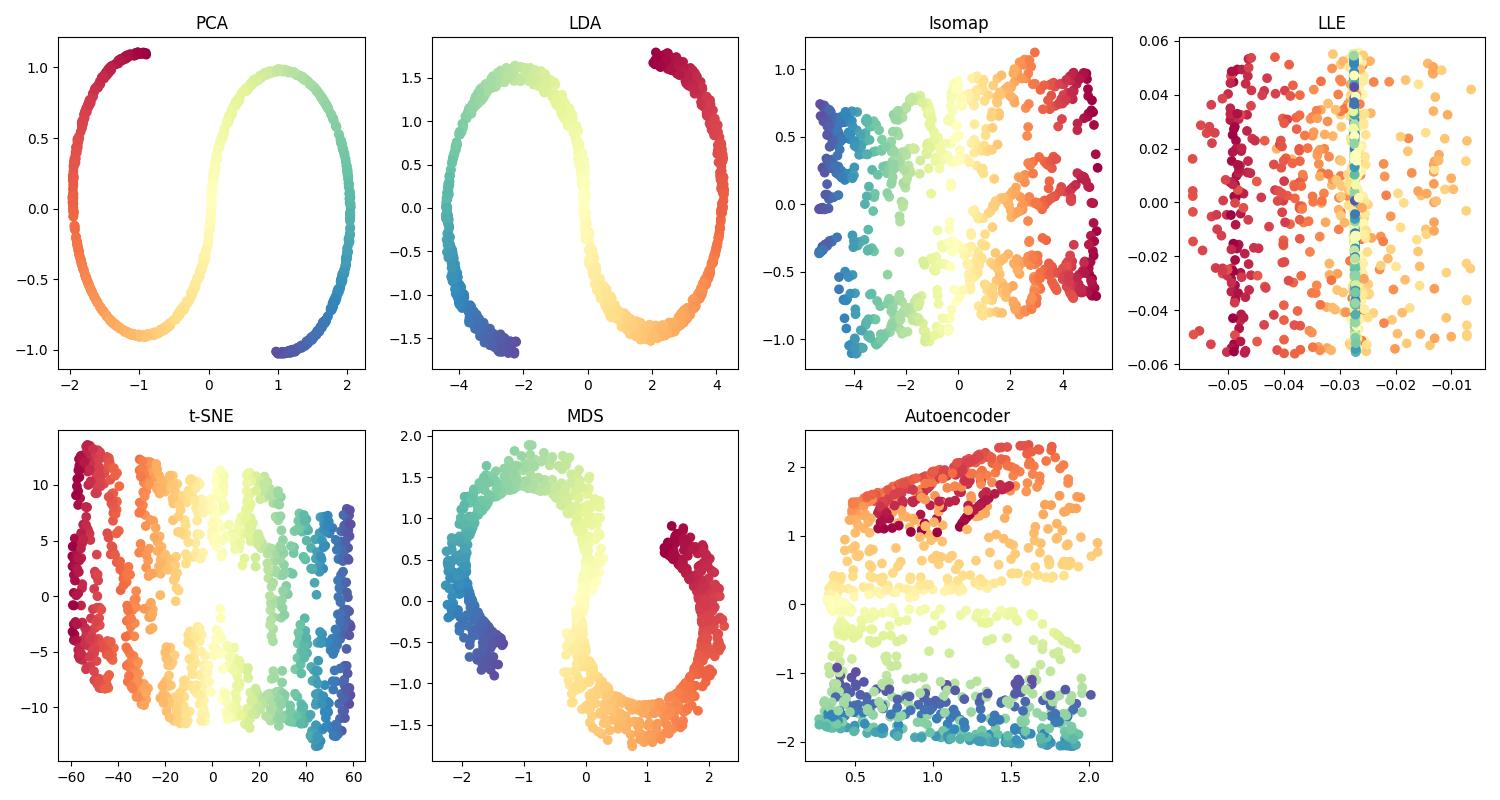---
**課題 10：** 次元削減をする方法として他にどのようなものがあるか調べてまとめて下さい。また、グラフで可視化して下さい。

解答例

<img src="figs/seven.jpg" width="1000px">

PCA、MDS、およびランダム射影

/Users/shishishikakou/Downloads/データサイエンス特論/.venv/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


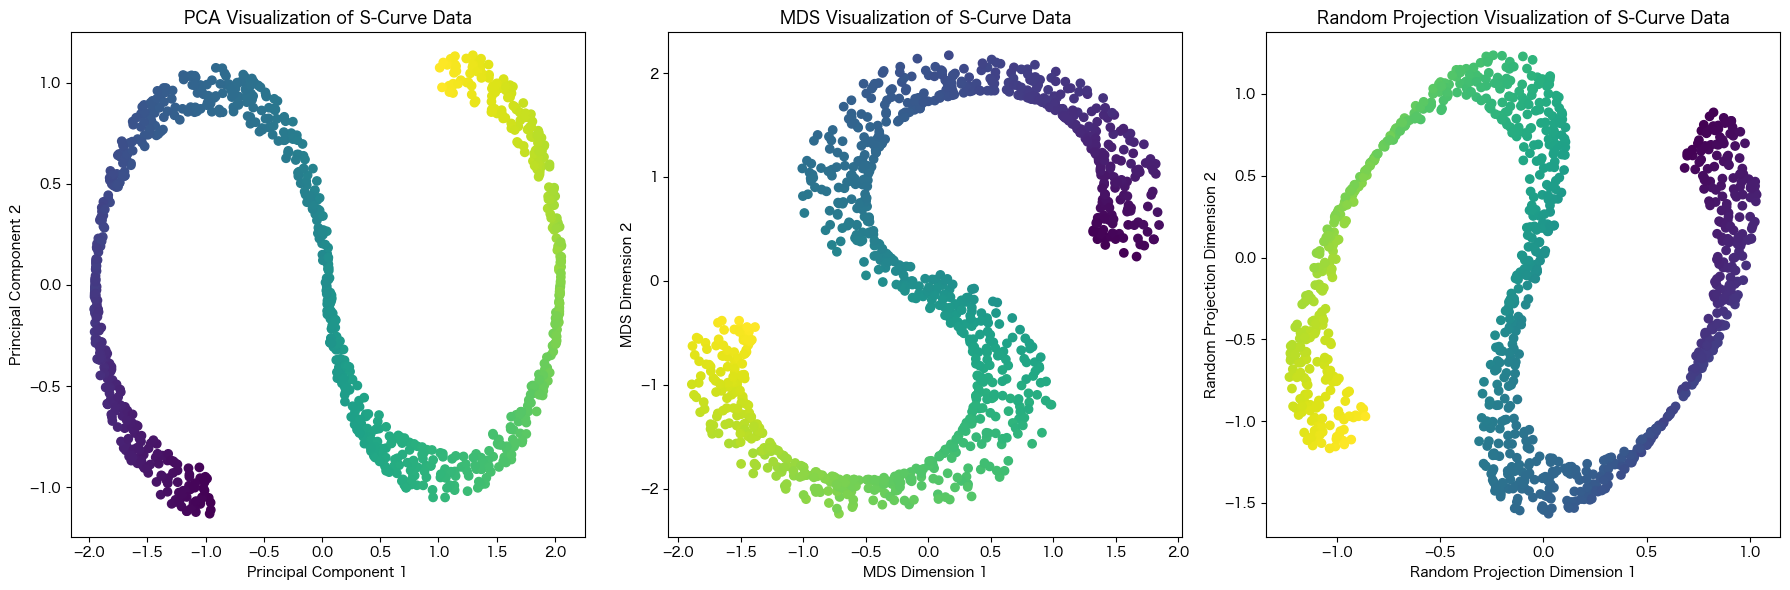

In [12]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.random_projection import GaussianRandomProjection
from sklearn import datasets

# S字データの生成
data, labels = datasets.make_s_curve(n_samples=1000, random_state=42)

# 各次元削減手法の適用
pca = PCA(n_components=2)
mds = MDS(n_components=2, random_state=42)
rp = GaussianRandomProjection(n_components=2, random_state=42)

data_pca = pca.fit_transform(data)
data_mds = mds.fit_transform(data)
data_rp = rp.fit_transform(data)

# 可視化
plt.figure(figsize=(18, 6))

# PCAの可視化
plt.subplot(1, 3, 1)
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels, cmap='viridis')
plt.title('PCA Visualization of S-Curve Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# MDSの可視化
plt.subplot(1, 3, 2)
plt.scatter(data_mds[:, 0], data_mds[:, 1], c=labels, cmap='viridis')
plt.title('MDS Visualization of S-Curve Data')
plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')

# ランダム射影の可視化
plt.subplot(1, 3, 3)
plt.scatter(data_rp[:, 0], data_rp[:, 1], c=labels, cmap='viridis')
plt.title('Random Projection Visualization of S-Curve Data')
plt.xlabel('Random Projection Dimension 1')
plt.ylabel('Random Projection Dimension 2')

plt.tight_layout()
plt.show()
